### kd-tree

In [1]:
from sklearn.datasets import make_blobs

X = make_blobs(n_samples=100000, n_features=20, 
               cluster_std=4.3, random_state=2342)

In [2]:
from sklearn.neighbors import KDTree, BallTree

kdtree_ = KDTree(X[0])

In [3]:
%%time
dist, ind = kdtree_.query(X[0][:3], k=5) # запрос на K ближайших
print(ind)

[[    0 92054 49654 71808 31343]
 [    1 25792 13936 84018  4815]
 [    2  5758 51801 88966 55509]]
CPU times: user 20.6 ms, sys: 3.5 ms, total: 24.1 ms
Wall time: 43.5 ms


In [4]:
%%time
ind = kdtree_.query_radius(X[0][:3], r=0.5) # запрос на ближайшие в радиусе
print(ind)

[array([0]) array([1]) array([2])]
CPU times: user 2.58 ms, sys: 2.5 ms, total: 5.09 ms
Wall time: 4.19 ms


### annoy

In [5]:
from annoy import AnnoyIndex

NUM_TREES = 10
VEC_SIZE = 20
DUMP_PATH = './'
OUT_PATH_ANNOY = DUMP_PATH + "database.ann_%d" % NUM_TREES

index_emb = AnnoyIndex(VEC_SIZE)

counter = 0

print("Build annoy base and save on disk %s" % OUT_PATH_ANNOY)
for img_vec in X[0]:
    index_emb.add_item(counter, img_vec)
    counter += 1
    
print("Saving")

index_emb.build(NUM_TREES)
index_emb.save(OUT_PATH_ANNOY)

print("Saved")

Build annoy base and save on disk ./database.ann_10
Saving
Saved


In [6]:
import itertools

index_emb = AnnoyIndex(VEC_SIZE)
index_emb.load(OUT_PATH_ANNOY)

True

In [7]:
%%time

annoy_res = list(index_emb.get_nns_by_vector(X[0][0], 5, include_distances=True))

for annoy_id, annoy_sim in itertools.islice(zip(*annoy_res), 13):
    print(annoy_id)

0
94847
73357
21531
35639
CPU times: user 2.04 ms, sys: 1.03 ms, total: 3.08 ms
Wall time: 10.9 ms


In [8]:
%%time

id_ = 0
annoy_res = list(index_emb.get_nns_by_item(id_, 5, include_distances=True))

for annoy_id, annoy_sim in itertools.islice(zip(*annoy_res), 13):
    print(annoy_id)

0
94847
73357
21531
35639
CPU times: user 1.54 ms, sys: 742 µs, total: 2.28 ms
Wall time: 2.47 ms


### K-means

In [9]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs

In [10]:
X = make_blobs(n_samples=400, centers=5, cluster_std=1.3, 
               random_state=2342)

In [11]:
colors = np.array(['b', 'r', 'ForestGreen', 'orange', 'Brown', 'c', 'y', 'g', 'm', 'k'])

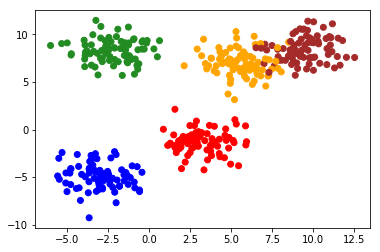

In [12]:
plt.scatter(X[0][:, 0], X[0][:, 1], color=colors[X[1]])

In [13]:
from sklearn.cluster import KMeans

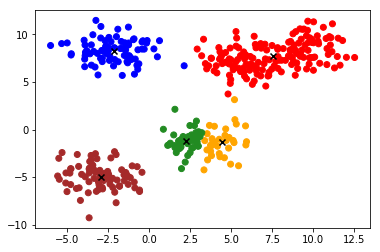

In [38]:
km = KMeans(n_clusters=5, random_state=1411, init='random', n_init=2)
pred_labels = km.fit_predict(X[0])

plt.scatter(X[0][:, 0], X[0][:, 1], color=colors[pred_labels])
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='x', c = 'k')

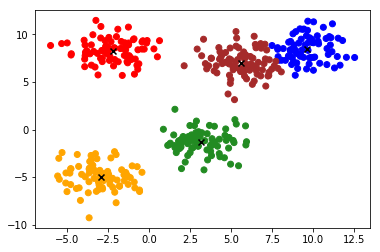

In [39]:
km = KMeans(n_clusters=5, random_state=1411, init='random', n_init=10)
pred_labels = km.fit_predict(X[0])

plt.scatter(X[0][:, 0], X[0][:, 1], color=colors[pred_labels])
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='x', c = 'k')

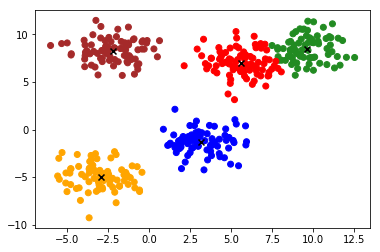

In [40]:
km = KMeans(n_clusters=5, random_state=1411, init='k-means++', n_init=2)
pred_labels = km.fit_predict(X[0])

plt.scatter(X[0][:, 0], X[0][:, 1], color=colors[pred_labels])
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='x', c = 'k')

### DBSCAN

In [41]:
colors = np.array(['b', 'r', 'ForestGreen', 'orange',
                   'Brown', 'c', 'y', 'g', 'm', 'k'] + ['k'
                                                for i in range(100)])

In [42]:
from sklearn.cluster import DBSCAN

14


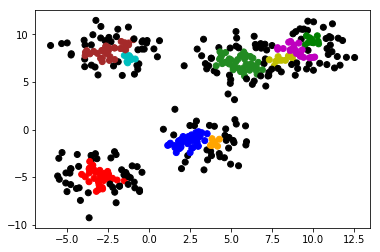

In [43]:
db = DBSCAN(eps=0.5, min_samples=5)

pred_labels = db.fit_predict(X[0])
print(len(np.unique(pred_labels)))
plt.scatter(X[0][:, 0], X[0][:, 1], color=colors[pred_labels]);

5


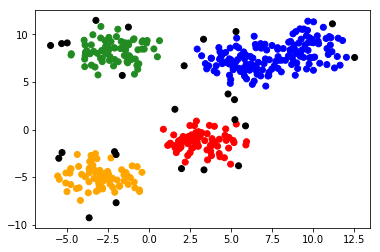

In [44]:
db = DBSCAN(eps=1.0, min_samples=5)

pred_labels = db.fit_predict(X[0])
print(len(np.unique(pred_labels)))
plt.scatter(X[0][:, 0], X[0][:, 1], color=colors[pred_labels]);